In [1]:
cd ..

/home/mescalin/htyao/Projects/VIECPLX


/home/mescalin/htyao/micromamba/envs/parnassus/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from src.foldingAlg import Final_list, ViennaFold

In [4]:
# DIR = Path('result/upper/')
DIR = Path('result/upper_loose/')

In [5]:
tmp = []
for x in DIR.iterdir():
    if "round" in x.name:
        tmp.append(pd.read_csv(x, sep='\t'))
df = pd.concat(tmp)
df

,label,path
0,RNAfold,30
1,RNAfold,26
2,RNAfold,26
3,RNAfold,39
4,RNAfold,21
...,...,...
295,Beam search,29
296,Beam search,26
297,Beam search,36
298,Beam search,36


In [6]:
df.to_csv(DIR/'upper_all.csv', sep='\t', index=None)

/home/mescalin/htyao/micromamba/envs/parnassus/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mescalin/htyao/micromamba/envs/parnassus/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mescalin/htyao/micromamba/envs/parnassus/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

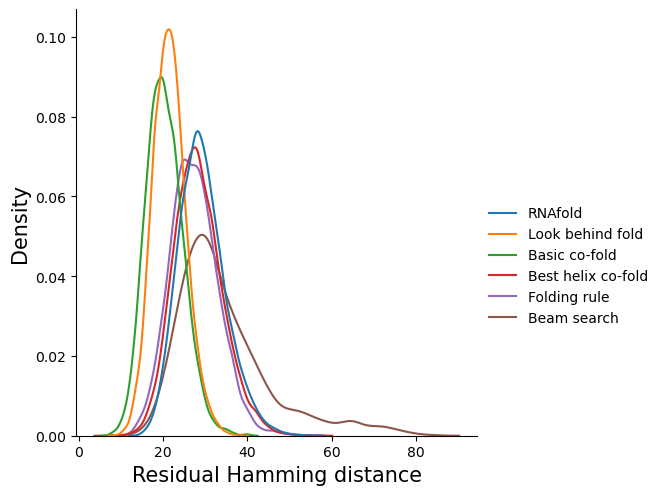

In [15]:
toplot = [x.name for x in Final_list]
# toplot = [ViennaFold.name]
labels = toplot[:]
labels[2] = 'Basic co-fold'
labels[3] = 'Best helix co-fold'
df = df[df['label'].isin(toplot)]
# g = sns.displot(data=df, x='path', hue='label', kind="hist", hue_order=toplot, element="poly", fill=False)
g = sns.displot(data=df, x='path', hue='label', kind="kde", hue_order=toplot, common_norm=False)
g._legend.set_title("")
for t, l in zip(g._legend.texts, labels):
    t.set_text(l)

plt.ylabel('Density', fontsize=15)
plt.xlabel('Residual Hamming distance', fontsize=15)
sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .6))
plt.savefig('doc/fig/upper_loose_all.pdf', dpi=200, bbox_inches='tight')